Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital. 

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

 

Data Description


Train.zip contains 1 csv alongside the data dictionary that contains definitions for each variable

train.csv – File containing features related to patient, hospital and Length of stay on case basis

train_data_dict.csv – File containing the information of the features in train file



Test Set

test.csv – File containing features related to patient, hospital. Need to predict the Length of stay for each case_id



Sample Submission:

case_id: Unique id for each case

Stay: Length of stay for the patient w.r.t each case id in test data

Features:

- case_id: Case_ID registered in Hospital
- Hospital_code: Unique code for the Hospital
- Hospital_type_code: Unique code for the type of Hospital
- City_Code_Hospital: City Code of the Hospital
- Hospital_region_code: Region Code of the Hospital
- Available Extra Rooms in Hospital: Number of Extra rooms available in the Hospital
- Department: Department overlooking the case
- Ward_Type: Code for the Ward type
- Ward_Facility_Code: Code for the Ward Facility
- Bed Grade: Condition of Bed in the Ward
- patientid: Unique Patient Id
- City_Code_Patient: City Code for the patient
- Type of Admission: Admission Type registered by the Hospital
- Severity of Illness: Severity of the illness recorded at the time of admission
- Visitors with Patient: Number of Visitors with the patient
- Age: Age of the patient
- Admission_Deposit: Deposit at the Admission Time
- Stay: Stay Days by the patient
- dataset: Indicates the data belongs to train set or test set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [3]:
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

# EDA

In [4]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [5]:
data.shape

(318438, 18)

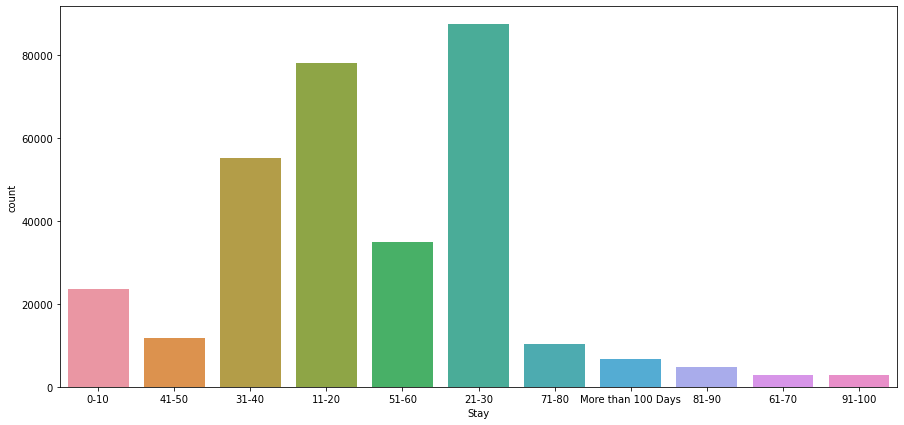

In [6]:
plt.figure(figsize=(15,7))
sns.countplot(data["Stay"])

In [7]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [8]:
data.drop(["case_id","City_Code_Patient","patientid"],axis=1,inplace=True)
test.drop(["case_id","City_Code_Patient","patientid"],axis=1,inplace=True)

In [9]:
data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [10]:
data['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [11]:
#sns.pairplot(data)

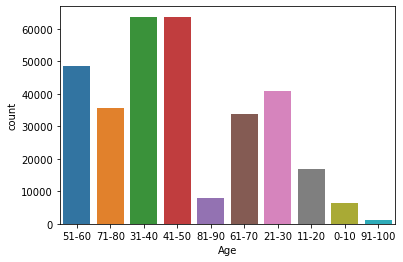

In [12]:
sns.countplot(data['Age'])

In [13]:
data.isna().sum()

Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                            113
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

In [14]:
data['Bed Grade'].unique() #array([ 2.,  3.,  4.,  1., nan])

array([ 2.,  3.,  4.,  1., nan])

In [15]:
data['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [16]:
data.fillna(method='ffill',inplace=True)

In [17]:
data.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

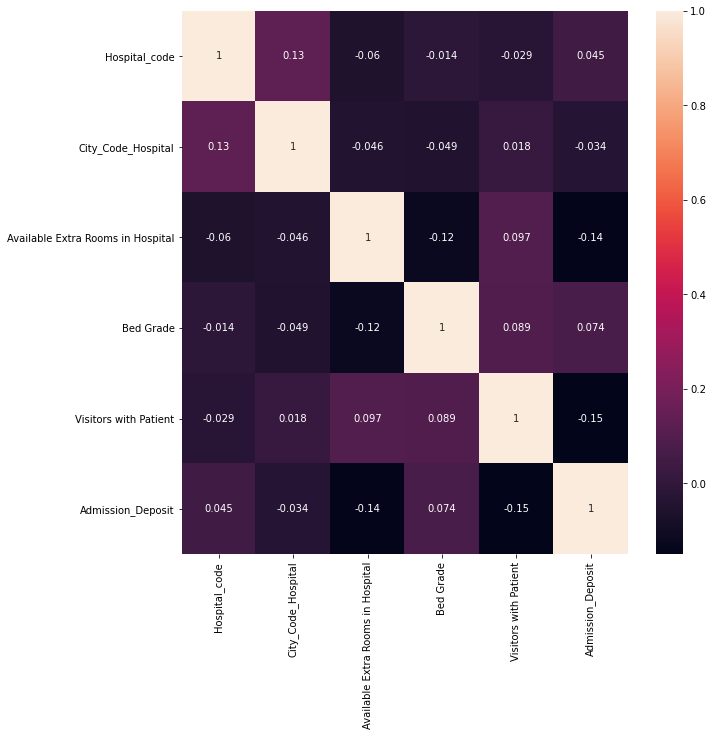

In [18]:
corr=data.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [19]:
#Encoding

cols= data.columns
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for i in range(len(cols)):
    if data[cols].dtypes[i] == 'object':
        data.iloc[:,i]= Le.fit_transform(data.iloc[:,i])


In [20]:
cols1= test.columns
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for i in range(len(cols1)):
    if test[cols1].dtypes[i] == 'object':
        test.iloc[:,i]= Le.fit_transform(test.iloc[:,i])

In [21]:
data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,1,0,2,5,5954.0,4
2,10,4,1,0,2,1,3,4,2.0,1,0,2,5,4745.0,3
3,26,1,2,1,2,3,2,3,2.0,1,0,2,5,7272.0,4
4,26,1,2,1,2,3,3,3,2.0,1,0,2,5,5558.0,4


In [22]:
#data.to_csv("")

# Model Making

In [24]:
X= data.iloc[:,:-1]
Y = data.iloc[:,-1]

[0.02436288 0.00654223 0.00716042 0.002828   0.09136649 0.0459583
 0.03068164 0.0049249  0.03806116 0.02342852 0.02119776 0.12481988
 0.13603064 0.44263718]


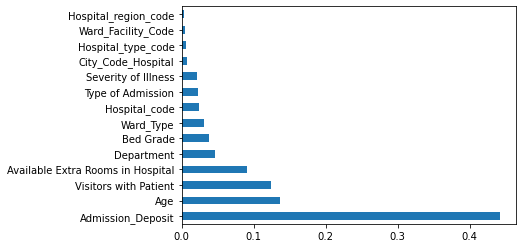

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [25]:
X.drop(['Hospital_region_code','Hospital_type_code','City_Code_Hospital'], inplace=True,axis=1)
test.drop(['Hospital_region_code','Hospital_type_code','City_Code_Hospital'], inplace=True,axis=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [40]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
test= sc.transform(test)

In [31]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
print("Accuracy Score for training Set", gaussian.score(X_train, Y_train))
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test,y_pred) * 100, 2)
print(acc_gaussian)

Accuracy Score for training Set 0.3619684989916048
36.3


In [32]:
labels = np.unique(Y_test)
a =  confusion_matrix(Y_test, y_pred, labels=labels)
pd.DataFrame(a, index=labels, columns=labels)

,0,1,2,3,4,5,6,7,8,9,10
0,61,1076,1201,46,1,5,0,0,0,0,0
1,26,2993,4182,300,13,249,0,2,3,0,6
2,21,2358,6067,161,23,118,1,1,1,0,22
3,10,1282,2315,909,8,856,1,14,10,0,32
4,7,312,687,84,4,89,1,0,0,0,9
5,4,494,700,897,6,1245,0,20,8,0,83
6,2,49,150,33,1,36,0,1,2,0,18
7,3,149,196,258,2,341,1,8,15,0,78
8,2,24,31,42,0,317,0,10,6,0,64
9,1,34,63,63,0,72,0,1,3,0,47


# Random Forest Classifer

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=20,oob_score=True)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=20, max_features=10, oob_score=True)

In [37]:
print(rf_model.score(X_train,Y_train)) # Score with Train Data

0.8056833011158643


In [39]:
y_pred = rf_model.predict(X_test)
accuracy_score(Y_test,y_pred) # Score with Test data

0.39759452330109285

# Random Forest Classifer- Random Search CV

In [42]:
from sklearn.model_selection import RandomizedSearchCV #Hyperparmeter tunning helps us to find out best parameters among all
#Randomized search CV
#numner of tress in random forest
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#Number of feature to conside at every split
max_features=['auto','sqrt']

#max number of levels in tree
max_depth= [int(x) for x in np.linspace(5,30,num=6)]

#minum number of samples required to split a node
min_samples_split= [2,5,10,15,100]

#min number of sample required at each leaf node
min_samples_leaf= [1,2,5,10]

#create the random grid
random_grid= {'n_estimators':n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 218, 336, 454, 572, 690, 809, 927, 1045, 1163, 1281, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [12, 17, 23, 28, 34, 40], 'min_samples_split': [5, 8, 10, 15, 100], 'min_samples_leaf': [5, 9, 8, 10, 12]}


In [45]:
y_pred = rf_random.predict(X_test)
accuracy_score(Y_test,y_pred) # Score with Test data

0.4111292551187037

In [44]:
rf= RandomForestClassifier()
rf_random= RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=15,cv=5,verbose=2,random_state=42,n_jobs=-1)
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 72.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [12, 17, 23, 28, 34, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 9, 8, 10, 12],
                                        'min_samples_split': [5, 8, 10, 15,
                                                              100],
                                        'n_estimators': [100, 218, 336, 454,
                                                         572, 690, 809, 927,
                                                         1045, 1163, 1281,
                                                         1400]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
import pickle
pickl_out= open("Random_forest_41%_CV.pkl",'wb')
pickle.dump(rf_random,pickl_out)
pickl_out.close()

In [27]:
d = pd.read_csv("test.csv")

In [28]:
d.drop(['Hospital_region_code','Hospital_type_code','City_Code_Hospital'], inplace=True,axis=1)

In [29]:
d.drop(["case_id","City_Code_Patient","patientid"],axis=1,inplace=True)

In [30]:
d.fillna(method='ffill',inplace=True)

In [31]:
d.isna().sum()

Hospital_code                        0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [32]:
cols1= d.columns
from sklearn.preprocessing import LabelEncoder,StandardScaler
Le = LabelEncoder()
for i in range(len(cols1)):
    if d[cols1].dtypes[i] == 'object':
        d.iloc[:,i]= Le.fit_transform(d.iloc[:,i])

In [33]:
sc= StandardScaler()
d= sc.fit_transform(d)

In [19]:
import pickle
model = pickle.load(open('Random_forest_41%_CV.pkl', 'rb'))

In [20]:
Stay_test = model.predict(d)

In [23]:
Stay= ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days']
a = LabelEncoder()
a.fit_transform(Stay)
list(a.inverse_transform([0]))

['0-10']

In [36]:
Stay[Stay_test[56]]

'21-30'

In [31]:
Stay_test[5]==2

True

In [38]:
#my_submission = pd.DataFrame({'Case_id': d["case_id"], 'Stay': Stay_test })
a=[]
for i in range(len(d)):
    if Stay_test[i]== 0:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 1:
         a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 2:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 3:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 4:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 5:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 6:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 7:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 8:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 9:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 10:
        a.append(Stay[Stay_test[i]])
    else:
        break

In [42]:
d= pd.read_csv('test.csv',usecols=["case_id"])
#test_Id=test['Id']
my_submission = pd.DataFrame({'case_id': d["case_id"], 'Stay': a })
my_submission.to_csv('submission_CVRandomForest.csv', index=False)

In [40]:
my_submission 

,Case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,11-20
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,21-30
137053,455492,0-10
137054,455493,21-30
137055,455494,11-20


In [42]:
"""
for i in range(10,15):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    acc_knn = round(accuracy_score(y_pred, Y_test) * 100, 2)
    print(acc_knn)
    """

'\nfor i in range(10,15):\n    knn= KNeighborsClassifier(n_neighbors=i)\n    knn.fit(X_train, Y_train)\n    y_pred = knn.predict(X_test)\n    acc_knn = round(accuracy_score(y_pred, Y_test) * 100, 2)\n    print(acc_knn)\n    '

In [37]:
for i in range(15,17):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    acc_knn = round(accuracy_score(y_pred, Y_test) * 100, 2)
    print(acc_knn)

36.68
36.61


In [46]:
"""
for i in range(17,25):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    acc_knn = round(accuracy_score(y_pred, Y_test) * 100, 2)
    print(acc_knn)
    """

'\nfor i in range(17,25):\n    knn= KNeighborsClassifier(n_neighbors=i)\n    knn.fit(X_train, Y_train)\n    y_pred = knn.predict(X_test)\n    acc_knn = round(accuracy_score(y_pred, Y_test) * 100, 2)\n    print(acc_knn)\n    '

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, Y_test) * 100, 2)
print(acc_knn)

37.34


In [45]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=knn, max_features=5,n_estimators=100)
bagging.fit(X_train,Y_train)
y_tbag = bagging.predict(X_test)
accuracy_score(Y_test,y_tbag) 

0.3862894108780304

In [47]:
y_ = bagging.predict(d)

In [48]:
Stay= ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days']
a=[]
for i in range(len(d)):
    if Stay_test[i]== 0:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 1:
         a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 2:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 3:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 4:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 5:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 6:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 7:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 8:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 9:
        a.append(Stay[Stay_test[i]])
    elif Stay_test[i]== 10:
        a.append(Stay[Stay_test[i]])
    else:
        break

NameError: name 'Stay_test' is not defined

In [ ]:
d= pd.read_csv('test.csv',usecols=["case_id"])
#test_Id=test['Id']
my_submission = pd.DataFrame({'case_id': d["case_id"], 'Stay': a })
my_submission.to_csv('submission_CVbaggingKNN.csv', index=False)